In [28]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [29]:
from dependencies.collection import collect_portfolio_data
from dependencies.data_preprocessing import preprocess_portfolio_data
from dependencies.analysis import calculate_portfolio_metrics
from dependencies.optimization import optimize_portfolio

In [30]:
%run dependencies/collection.py

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [31]:
sym=["AAPL", "MSFT", "GOOGL", "TSLA"]

In [32]:
df=pd.read_csv("portfolio_data.csv")
df.head(5)

,AAPL,Date_AAPL,MSFT,Date_MSFT,GOOGL,Date_GOOGL,TSLA,Date_TSLA
0,23.914480,2016-01-04,48.521473,2016-01-04,37.972000,2016-01-04,14.894000,2016-01-04
1,23.315199,2016-01-05,48.742825,2016-01-05,38.076500,2016-01-05,14.895333,2016-01-05
2,22.858934,2016-01-06,47.857395,2016-01-06,37.966499,2016-01-06,14.602667,2016-01-06
3,21.894184,2016-01-07,46.192787,2016-01-07,37.049999,2016-01-07,14.376667,2016-01-07
4,22.009941,2016-01-08,46.334461,2016-01-08,36.545502,2016-01-08,14.066667,2016-01-08


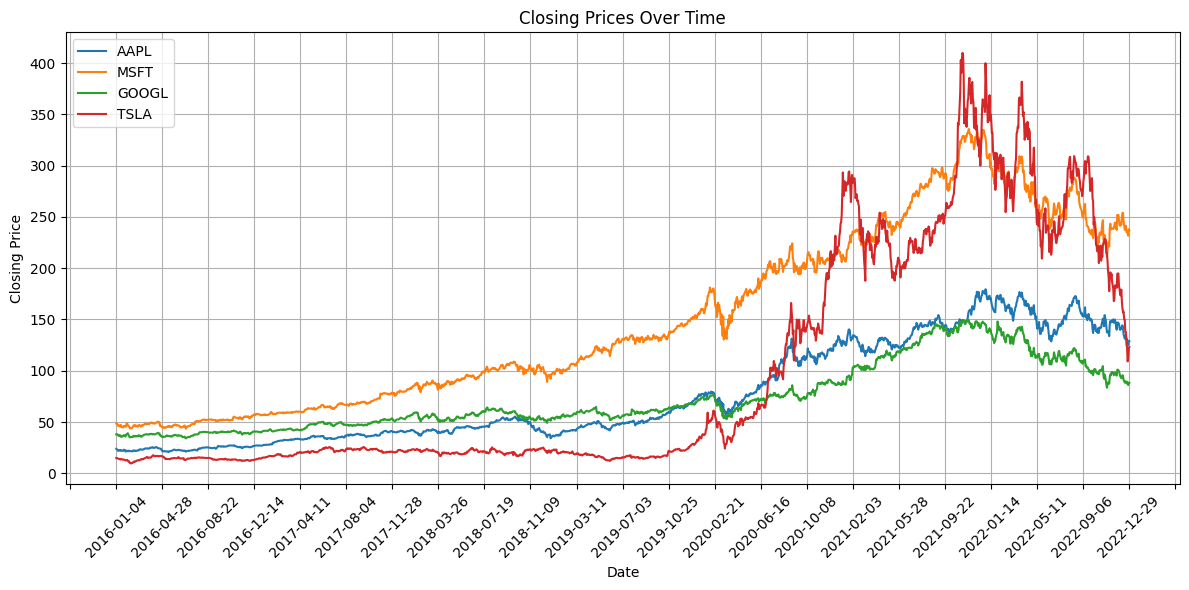

In [33]:
plt.figure(figsize=(12, 6))
for i in sym:
    plt.plot(df[f'Date_{i}'], df[i], label=i)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Prices Over Time")
plt.legend(loc="upper left")
plt.grid(True)

plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

plt.tight_layout()
plt.show()

In [34]:
ndf=preprocess_portfolio_data(df)
ndf.head(5)

,AAPL,Date_AAPL,MSFT,Date_MSFT,GOOGL,Date_GOOGL,TSLA,Date_TSLA,Log Returns (AAPL),Log Returns (MSFT),Log Returns (GOOGL),Log Returns (TSLA),Rolling Mean (AAPL),Rolling Mean (MSFT),Rolling Mean (GOOGL),Rolling Mean (TSLA),Rolling Std (AAPL),Rolling Std (MSFT),Rolling Std (GOOGL),Rolling Std (TSLA)
0,NaN,2016-01-04,NaN,2016-01-04,NaN,2016-01-04,NaN,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.025059,2016-01-05,0.004562,2016-01-05,0.002752,2016-01-05,0.000090,2016-01-05,-0.025379,0.004552,0.002748,0.000090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.019569,2016-01-06,-0.018165,2016-01-06,-0.002889,2016-01-06,-0.019648,2016-01-06,-0.019763,-0.018332,-0.002893,-0.019844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.042205,2016-01-07,-0.034783,2016-01-07,-0.024140,2016-01-07,-0.015477,2016-01-07,-0.043121,-0.035402,-0.024436,-0.015598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.005287,2016-01-08,0.003067,2016-01-08,-0.013617,2016-01-08,-0.021563,2016-01-08,0.005273,0.003062,-0.013710,-0.021799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
metrics=calculate_portfolio_metrics(ndf)
print("Portfolio Metrics")
metrics

Portfolio Metrics


{'Portfolio Return': 0.000883801531474339,
 'Portfolio Risk': 0.01866568564505687,
 'Mean Returns': Log Returns (AAPL)     0.000956
 Log Returns (MSFT)     0.000900
 Log Returns (GOOGL)    0.000479
 Log Returns (TSLA)     0.001200
 dtype: float64,
 'Standard Deviation': Log Returns (AAPL)     0.019148
 Log Returns (MSFT)     0.017742
 Log Returns (GOOGL)    0.017782
 Log Returns (TSLA)     0.036998
 dtype: float64,
 'Weights': array([0.25, 0.25, 0.25, 0.25])}

In [41]:
returns = [col for col in ndf.columns if "Returns" in col]
exp_returns =ndf[returns].mean()
cov_matrix =ndf[returns].cov()

constraints={
    "min_allocation": [0.0] * len(sym),
    "max_allocation": [1.0] * len(sym),
}

RFR=0.03

In [42]:
optimized = optimize_portfolio(exp_returns, cov_matrix, constraints, RFR)

In [43]:
print("Optimized Weights:")
print(optimized["Portfolio Weights"])
print("\nPortfolio Return:", optimized["Portfolio Return"])
print("Portfolio Volatility:", optimized["Portfolio Volatility"])
print("Sharpe Ratio:", optimized["Sharpe Ratio"])

Optimized Weights:
[1. 1. 1. 1.]

Portfolio Return: 0.003535206125897355
Portfolio Volatility: 0.07466274258022747
Sharpe Ratio: -0.35445783210636


In [44]:
print("\nPortfolio Allocation Table")

optimized_weights=optimized["Portfolio Weights"]
PAT=pd.DataFrame(optimized_weights, 
                                    index=sym, 
                                    columns=["Allocation"])
PAT


Portfolio Allocation Table


,Allocation
AAPL,1.0
MSFT,1.0
GOOGL,1.0
TSLA,1.0


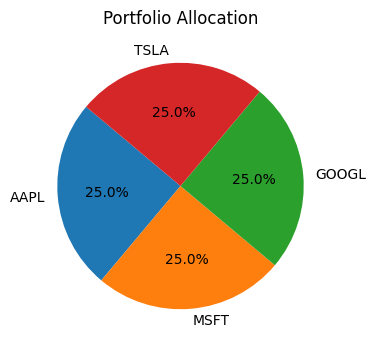

In [46]:
plt.figure(figsize=(4, 4))
plt.pie(optimized_weights, 
        labels=sym, 
        autopct='%1.1f%%', startangle=140)
plt.title("Portfolio Allocation")
plt.show()